# SLOVENSKE OBČINE

Projekt pri predmetu Programiranje 1 - analiza podatkov.

## Priprava

Iz [spletne strani STAT](http://pxweb.stat.si/pxweb/Database/Obcine/Obcine.asp) sem dne 13.1.2017 pobrala podatke o slovenskih občinah za drugo polletje leta 2016:
- Občina,
- Površina km2,
- Št. naselij,
- Št. prebivalcev,
- Moški,
- Ženske,
- 0-14 let,
- 15-64 let,
- 65+ let,
- Naravni prirastek,
- Povprečna bruto plača,
- Delovno aktivno prebivalstvo,
- Registrirane brezposelne osebe,
- Število OŠ,
- Število osnovnošolcev,
- Število dijakov,
- Število študentov,
- Ustanovitev,
- Pokrajina,
- Statistična regija

Podatke sem spravila v CSV datoteko.


In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_rows = 30
pd.options.display.max_columns = 10

csv = pd.read_csv('občine.csv')

In [2]:
%matplotlib inline

In [3]:
csv

,Občina,Površina km2,Št. naselij,Št. prebivalcev,Moški,...,Število dijakov,Število študentov,Ustanovitev,Pokrajina,Statistična regija
0,Ajdovščina,245.2,45,19061,9624,...,748,869,1991,Primorska,Goriška
1,Ankaran,8.0,1,3227,1575,...,102,104,2011,Primorska,Obalno-kraška
2,Apače,53.5,21,3564,1771,...,113,85,2006,Štajerska,Pomurska
3,Beltinci,62.2,8,8258,4120,...,323,303,1994,Prekmurje,Pomurska
4,Benedikt,24.1,13,2506,1252,...,113,93,1998,Štajerska,Podravska
5,Bistrica ob Sotli,31.1,11,1368,678,...,64,52,1998,Štajerska,Savinjska
6,Bled,72.3,10,7998,3925,...,270,315,1994,Gorenjska,Gorenjska
7,Bloke,75.1,45,1541,821,...,56,78,1998,Notranjska,Notranjsko-kraška
8,Bohinj,333.7,24,5127,2548,...,192,217,1994,Gorenjska,Gorenjska
9,Borovnica,42.3,12,4295,2155,...,160,186,1994,Notranjska,Osrednjeslovenska


# Analiza podatkov

Pri analizi podatkov me je zanimalo naslednje:
       1. katere pokrajine in statistične regije imamo in kako so zastopane v celi Sloveniji
       2. kaj vpliva na gostoto prebivalstva na določenih območjih in kje lahko pričakujemo 
          zgoščanje/redčenje prebivalstva
          kam se je dobro preseliti glede na določene parametre
 

## 1 Pokrajine in statistične regije

Za začetek si oglejmo slovenske pokrajine. Najprej sem pogledala, koliko občin je v vsaki pokrajini in za lažjo predstavo to podala s tortnim grafom, ki nam predstavi zastopanost pokrajin v Sloveniji.

Štajerska     87
Dolenjska     31
Gorenjska     31
Primorska     23
Prekmurje     19
Notranjska    12
Koroška        9
Name: Pokrajina, dtype: int64

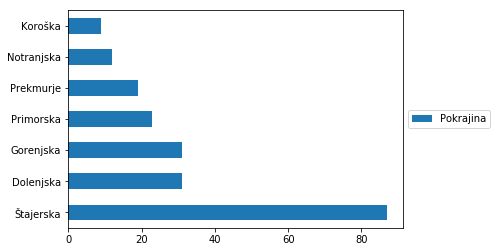

In [4]:
GrafPokrajin = csv['Pokrajina'].value_counts().plot(kind='barh', stacked=True, legend=False)
GrafPokrajin.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

Pokrajine = csv['Pokrajina'].value_counts()
Pokrajine

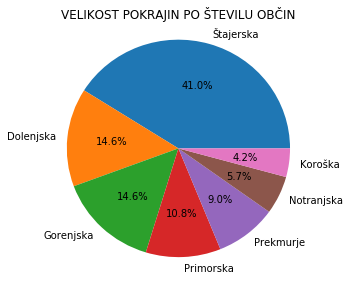

In [5]:
GrafPokrajine = csv['Pokrajina'].value_counts().plot(kind='pie', figsize=(5, 5), fontsize=10, autopct='%1.1f%%')
GrafPokrajine.set_title('VELIKOST POKRAJIN PO ŠTEVILU OBČIN', horizontalalignment='center', verticalalignment='top')
GrafPokrajine.set_ylabel('')

Oglejmo si še, katere statistične regije imamo in kako so zastopane v vsaki pokrajini:

Podravska            40
Savinjska            33
Osrednjeslovenska    27
Pomurska             27
Jugovzhodna          19
Gorenjska            19
Goriška              13
Koroška              12
Obalno-kraška        10
Notranjsko-kraška     5
Spodnjeposavska       4
Zasavska              3
Name: Statistična regija, dtype: int64

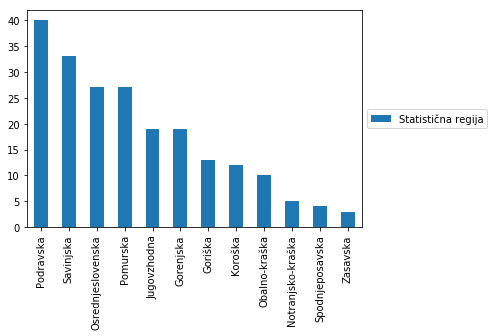

In [6]:
GrafRegij = csv['Statistična regija'].value_counts().plot(kind='bar', stacked=True, legend=False)
GrafRegij.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

Regije = csv['Statistična regija'].value_counts()
Regije

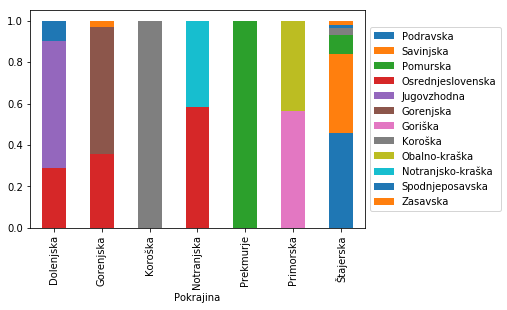

In [7]:
a = csv.groupby('Pokrajina')['Statistična regija']
regije = ['Podravska', 'Savinjska', 'Pomurska', 'Osrednjeslovenska', 'Jugovzhodna', 'Gorenjska', 'Goriška', 'Koroška',
           'Obalno-kraška', 'Notranjsko-kraška', 'Spodnjeposavska', 'Zasavska']
RegijePoPokrajinah = pd.DataFrame(a.value_counts()).unstack()['Statistična regija'][regije]

RegijePoPokrajinahGraf = RegijePoPokrajinah.div(RegijePoPokrajinah.sum(axis=1), axis=0)
Graf = RegijePoPokrajinahGraf.plot(kind='bar', stacked=True, legend=True)
Graf.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))


Zgoraj vidimo razdelitev po številu občin. Štajerska ima največje število občin in je regijsko najbolj raznolika. Ali to pomeni, da je največja tudi po površini?

,Površina km2,Odstotek,Povprečna velikost občine
Pokrajina,,,
Štajerska,5609.0,27.7,64.5
Dolenjska,4195.6,20.7,135.3
Primorska,3644.8,18.0,158.5
Gorenjska,3294.1,16.2,106.3
Notranjska,1797.3,8.9,149.8
Prekmurje,948.5,4.7,49.9
Koroška,783.7,3.9,87.1


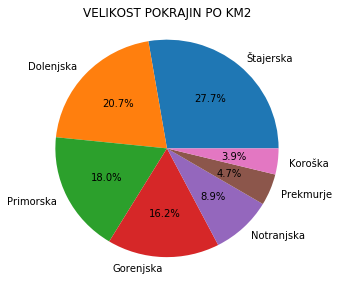

In [8]:
VsePokrajine = csv.groupby('Pokrajina')
Pokrajine = VsePokrajine.sum()

Pokrajine = Pokrajine[Pokrajine.columns[:1]]

SkupnaPovršina = 20273.0

Pokrajine['Odstotek'] = np.round(100 * Pokrajine['Površina km2'] / SkupnaPovršina, 1)
Pokrajine['Povprečna velikost občine'] = np.round(Pokrajine['Površina km2'] / csv['Pokrajina'].value_counts(), 1)

Končno = Pokrajine.sort_values(['Odstotek'], ascending=[False])
Končno

GrafPokrajine = Končno['Površina km2'].plot(kind='pie', figsize=(5, 5), fontsize=10, autopct='%1.1f%%')
GrafPokrajine.set_title('VELIKOST POKRAJIN PO KM2', horizontalalignment='center', verticalalignment='top')
GrafPokrajine.set_ylabel('')

Končno

Odgovor je ne: število občin ni dober merilec tega, kako velika je pokrajina. V zadnjem stolpcu zgornje tabele vidimo povprečno velikost občine v posamezni pokrajini. Ker pri teh številih pride do razlik (v Prekmurju so občine trikrat manjše kot na Primorskem), pride do odstopanj. Zato je velikost pokrajin po km2 bolj verodostojna kot velikost po številu občin.


## 2 Prebivalstvo



In [9]:
# dodamo stolpec gostote poseljenosti na km2, ki ga dobimo z deljenjem števila prebivalstva s površino vsake občine 
# in zaokrožimo na dve decimalki
csv['Gostota prebivalstva na km2'] = np.round(csv['Št. prebivalcev'] / csv['Površina km2'], 2)

In [10]:
VsePokrajine = csv.groupby('Pokrajina')
Pokrajine = VsePokrajine.sum()

Pokrajine = Pokrajine[Pokrajine.columns[:12]]
Pokrajine['Gostota poseljenosti'] = np.round(Pokrajine['Št. prebivalcev'] / Pokrajine['Površina km2'], 2)

Končno = Pokrajine.sort_values(['Gostota poseljenosti'], ascending=[False])
Končno

,Površina km2,Št. naselij,Št. prebivalcev,Moški,Ženske,...,Naravni prirastek,Povprečna bruto plača,Delovno aktivno prebivalstvo,Registrirane brezposelne osebe,Gostota poseljenosti
Pokrajina,,,,,,,,,,,
Dolenjska,4195.6,1739,535359,263826,271533,...,1030,42403.27,212229,29896,127.60
Štajerska,5609.0,1880,677264,337349,339915,...,-853,115804.11,256162,40983,120.75
Gorenjska,3294.1,1039,363544,179874,183670,...,839,45315.86,147935,14853,110.36
Prekmurje,948.5,177,78121,38187,39934,...,-232,24387.35,26376,6848,82.36
Koroška,783.7,113,61249,30667,30582,...,-13,12734.07,23615,2975,78.15
Primorska,3644.8,744,241469,120191,121278,...,-111,32421.99,94284,11289,66.25
Notranjska,1797.3,344,107235,53778,53457,...,147,16237.95,44043,5164,59.66


V tabeli vidimo, da sta Dolenjska in Štajerska med gosteje poseljenimi slovenskimi pokrajinami, Primorska in Notranjska pa med redkeje poseljenimi območji.
V nadaljevanju bom analizirala zakaj je temu tako: ali je to povezano s številom prebivalk pokrajine, z naravnim prirastkom, zaposlitvenimi možnostmi...


In [11]:
Pokrajine['Razlika Ž-M'] = Pokrajine['Ženske'] - Pokrajine['Moški']
Pokrajine['Razmerje Z-B'] = np.round(Pokrajine['Delovno aktivno prebivalstvo'] / Pokrajine['Registrirane brezposelne osebe'],1)
Pokrajine['Zaslužek'] = np.round(Pokrajine['Povprečna bruto plača'] / csv['Pokrajina'].value_counts(), 2)
Pokrajine['Odstotek starejših'] = np.round(Pokrajine['65+ let'] / Pokrajine['Št. prebivalcev'] * 100,2)

Tabela = Pokrajine[['Razlika Ž-M', 'Naravni prirastek', 'Razmerje Z-B', 'Zaslužek', 'Odstotek starejših', 'Gostota poseljenosti']]
Končno = Tabela.sort_values(['Gostota poseljenosti'], ascending=[False])
Končno

,Razlika Ž-M,Naravni prirastek,Razmerje Z-B,Zaslužek,Odstotek starejših,Gostota poseljenosti
Pokrajina,,,,,,
Dolenjska,7707,1030,7.1,1367.85,17.92,127.60
Štajerska,2566,-853,6.3,1331.08,19.06,120.75
Gorenjska,3796,839,10.0,1461.80,17.94,110.36
Prekmurje,1747,-232,3.9,1283.54,20.25,82.36
Koroška,-85,-13,7.9,1414.90,18.68,78.15
Primorska,1087,-111,8.4,1409.65,20.19,66.25
Notranjska,-321,147,8.5,1353.16,18.04,59.66


In [12]:
povprečje = Končno.mean()
povprečje

Razlika Ž-M             2356.714286
Naravni prirastek        115.285714
Razmerje Z-B               7.442857
Zaslužek                1374.568571
Odstotek starejših        18.868571
Gostota poseljenosti      92.161429
dtype: float64

Opazimo, da sta naravni prirastek in odstotek starejših povezana (starejši nad 18.5%, naravni prirastek < 0). To vsekakor vpliva na gostoto poseljenosti, zato lahko pričakujemo (v kolikor se te številke ne bodo drastično spreminjale) redčenje prebivalsta na Štajerskem, v Prekmurju, na Primorskem in Koroškem.
Na Dolenjskem in Gorenjskem lahko pričakujemo gostejše prebivalstvo glede na trenutne podatke.
Na gostoto poseljenosti torej v veliki meri vpliva odstotek starejših in naravni prirastek, malo manj razlika med spoloma, vpliv zaslužka in razmerja med zaposlenimi/brezposelnimi je minimalen.


#### Kam se preseliti, če:
- si starejši občan

In [41]:
csv['Odstotek starejših'] = np.round(csv['65+ let'] / csv['Št. prebivalcev'] * 100,2)
StarejšimPrijazni = csv[csv['Odstotek starejših'] > 24]
StarejšimPrijazni[StarejšimPrijazni.columns[:1]]

,Občina
10,Bovec
48,Hodoš
70,Kostel
73,Kranjska Gora
118,Osilnica


- si karierist

In [63]:
DobriZaslužki = csv[csv['Povprečna bruto plača'] > 1650]
DobriZaslužki[DobriZaslužki.columns[:1]]

,Občina
17,Cerklje na Gorenjskem
27,Dobje
67,Komenda
82,Ljubljana
114,Novo mesto
147,Ruše
180,Šoštanj


- si novopečena družina

In [46]:
Prirastek = csv[csv['Naravni prirastek'] > 90]
Prirastek[Prirastek.columns[:1]]

,Občina
34,Domžale
45,Grosuplje
72,Kranj
82,Ljubljana


- študent

In [57]:
csv['Odstotek študentov'] = np.round(csv['Število študentov'] / csv['Št. prebivalcev'] * 100,2)
Študentski = csv[csv['Odstotek študentov'] > 5]
Študentski[Študentski.columns[:1]]

#tu pride do napake, saj študentje večinoma nimajo stalnega prebivališča v kraju izobraževanja. Sklepali bi lahko, da
#je največji odstotek študentov v univerzitetnih središčih (Ljubljana, Maribor...)

,Občina
7,Bloke
63,Kobarid
90,Luče
111,Naklo
198,Vodice
211,Žužemberk


- ne maraš radovednih sosedov

In [62]:
csv['Gostota poseljenosti'] = np.round(csv['Št. prebivalcev'] / csv['Površina km2'], 2)
Sosedje = csv[csv['Gostota poseljenosti'] < 16]
Sosedje[Sosedje.columns[:1]]

,Občina
8,Bohinj
10,Bovec
58,Jezersko
70,Kostel
88,Loški Potok
90,Luče
118,Osilnica
156,Solčava
